In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def golden_search(_a, _b, _gamma, _K):
    epsilon = 0.001
    phi = 0.5 * (1.0 + math.sqrt(5.0))
    x1 = _b - ((_b - _a) / phi)
    x2 = _a + ((_b - _a) / phi)
    if(x1 != 1.0):
        y1 = ((1.0 - x1) * (_gamma + x1 ** _K) / (1.0 - x1 ** (_K + 1.0)))
    else:
        y1 = (_gamma + 1.0) / (1.0 + _K)
    if(x2 != 1.0):
        y2 = ((1.0 - x2) * (_gamma + x2 ** _K) / (1.0 - x2 ** (_K + 1.0)))
    else:
        y2 = (_gamma + 1.0) / (1.0 + _K)
    if(y1 >= y2):
        _a = x1
    else:
        _b = x2
    if(abs(_b - _a) < epsilon):
        return (_a + _b) / 2
    else:
        return golden_search(_a, _b, _gamma, _K)

In [3]:
def optimal_value(_gamma, _K):
    if(_gamma > 0 and _gamma < 1.0):
        a = (_gamma / _K) ** (1.0 / (_K - 1.0))
        b = 1.0
        return golden_search(a, b, _gamma, _K)
    elif(_gamma > 1.0):
        a = 1.0
        b = ((_K + 1.0) * _gamma) ** (1.0 / (_K - 1))
        return golden_search(a, b, _gamma, _K)
    else:
        return 1.0

## Сравнение N относительно gamma

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]
[2. 3. 3. 4. 4. 4. 4. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9.
 9. 9.]


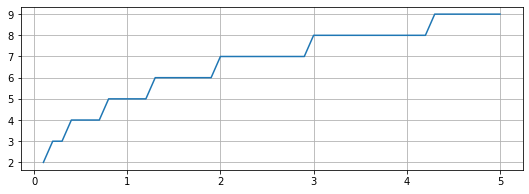

In [4]:
lambd = 1
mu = 5
N = 5
gamma = np.linspace(0.1, 5)
n = np.zeros((50,), dtype=float)
rho = N * lambd / mu
K = 5
p0 = 0
pk = 0
C = np.zeros(50)
if(rho == 1.0):
    p0 = 1.0 / (K + 1.0)
    pk = p0
elif(rho > 0):
    p0 = ((1.0) - rho) / (1.0 - rho ** (K + 2))
    pk = ((1.0) - rho) / (1.0 - rho ** (K + 2)) * rho ** K
for i in range(0, 50):
    rho = optimal_value(gamma[i], K)
    n1 = math.floor(rho * mu / lambd)
    n2 = math.ceil(rho * mu / lambd)
    C1 = 0
    C2 = 0
    if((n1 * lambd / mu) != 1.0):
        C1 = (1.0 - (n1 * lambd / mu)) * (gamma[i] + (n1 * lambd / mu) ** K) / (1.0 - (n1 * lambd / mu) ** (K + 1.0))
    else:
        C1 = (gamma[i] + 1.0) / (1.0 + K)
    if((n2 * lambd / mu) != 1.0):
        C2 = (1.0 - (n2 * lambd / mu)) * (gamma[i] + (n2 * lambd / mu) ** K) / (1.0 - (n2 * lambd / mu) ** (K + 1.0))
    else:
        C2 = (gamma[i] + 1.0) / (1.0 + K)
    if(C1 < C2):
        n[i] = n1
    else:
        n[i] = n2
        
print(gamma)
print(n)
plt.figure(figsize=(9, 3))
plt.plot(gamma, n)
plt.grid(True)
plt.show()

## rho от К при gamma = 0.5

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20.]
[0.36596633 0.59937953 0.70964347 0.77295417 0.8135026  0.84211141
 0.86287225 0.87877565 0.89141476 0.90183741 0.91036827 0.91728173
 0.92361138 0.92888696 0.9334136  0.9375753  0.94097307 0.94409231
 0.94717753]


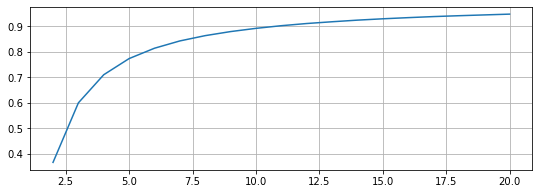

In [5]:
lambd = 1
mu = 5
gamma = 0.5
K = np.linspace(2, 20, 19)
rho = np.zeros(19)
for i in range(0, 19):
    rho[i] = optimal_value(gamma, K[i])
print(K)
print(rho)
plt.figure(figsize=(9, 3))
plt.plot(K, rho)
plt.grid(True)
plt.show()

## rho от К при gamma = 2

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20.]
[2.73212226 1.66773827 1.40878759 1.29362631 1.22906297 1.18763561
 1.15895359 1.13807786 1.12173066 1.10880445 1.09852674 1.0902954
 1.0828621  1.07641877 1.07127993 1.06673758 1.0629722  1.05932461
 1.05602913]


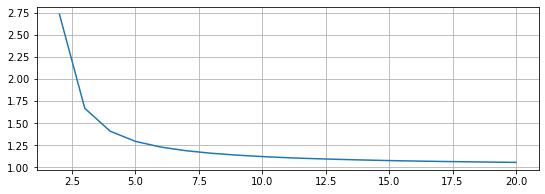

In [6]:
lambd = 1
mu = 5
gamma = 2
K = np.linspace(2, 20, 19)
rho = np.zeros(19)
for i in range(0, 19):
    rho[i] = optimal_value(gamma, K[i])
print(K)
print(rho)
plt.figure(figsize=(9, 3))
plt.plot(K, rho)
plt.grid(True)
plt.show()

## N относительно K при gamma = 0.5

[2. 3. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20.]


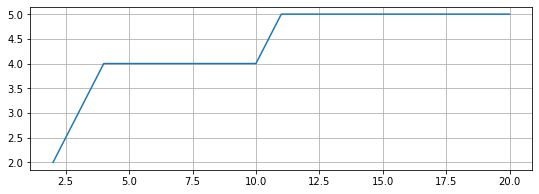

In [7]:
lambd = 1
mu = 5
gamma = 0.5
n = np.zeros((19,), dtype=float)
K = np.linspace(2, 20, 19)
N = 5
rho = N * lambd / mu
p0 = 0
pk = 0
if(rho == 1.0):
    p0 = 1.0 / (K + 1.0)
    pk = p0
elif(rho > 0):
    p0 = ((1.0) - rho) / (1.0 - rho ** (K + 2))
    pk = ((1.0) - rho) / (1.0 - rho ** (K + 2)) * rho ** K
for i in range(0, 19):
    rho = optimal_value(gamma, K[i])
    n1 = math.floor(rho * mu / lambd)
    n2 = math.ceil(rho * mu / lambd)
    C1 = 0
    C2 = 0
    if((n1 * lambd / mu) != 1.0):
        C1 = (1.0 - (n1 * lambd / mu)) * (gamma + (n1 * lambd / mu) ** K[i]) / (1.0 - (n1 * lambd / mu) ** (K[i] + 1.0))
    else:
        C1 = (gamma + 1.0) / (1.0 + K[i])
    if((n2 * lambd / mu) != 1.0):
        C2 = (1.0 - (n2 * lambd / mu)) * (gamma + (n2 * lambd / mu) ** K[i]) / (1.0 - (n2 * lambd / mu) ** (K[i] + 1.0))
    else:
        C2 = (gamma + 1.0) / (1.0 + K[i])
    if(C1 < C2):
        n[i] = n1
    else:
        n[i] = n2
        
print(n)
print(K)
plt.figure(figsize=(9, 3))
plt.plot(K, n)
plt.grid(True)
plt.show()

## N относительно K при gamma = 2

[14.  8.  7.  7.  6.  6.  6.  6.  6.  6.  6.  5.  5.  5.  5.  5.  5.  5.
  5.]
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20.]


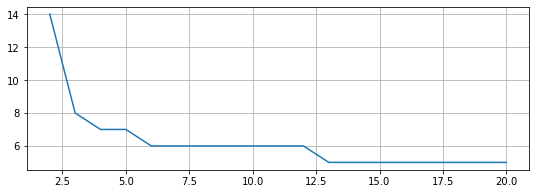

In [8]:
lambd = 1
mu = 5
gamma = 2
n = np.zeros((19,), dtype=float)
K = np.linspace(2, 20, 19)
N = 5
rho = N * lambd / mu
p0 = 0
pk = 0
if(rho == 1.0):
    p0 = 1.0 / (K + 1.0)
    pk = p0
elif(rho > 0):
    p0 = ((1.0) - rho) / (1.0 - rho ** (K + 2))
    pk = ((1.0) - rho) / (1.0 - rho ** (K + 2)) * rho ** K
for i in range(0, 19):
    rho = optimal_value(gamma, K[i])
    n1 = math.floor(rho * mu / lambd)
    n2 = math.ceil(rho * mu / lambd)
    C1 = 0
    C2 = 0
    if((n1 * lambd / mu) != 1.0):
        C1 = (1.0 - (n1 * lambd / mu)) * (gamma + (n1 * lambd / mu) ** K[i]) / (1.0 - (n1 * lambd / mu) ** (K[i] + 1.0))
    else:
        C1 = (gamma + 1.0) / (1.0 + K[i])
    if((n2 * lambd / mu) != 1.0):
        C2 = (1.0 - (n2 * lambd / mu)) * (gamma + (n2 * lambd / mu) ** K[i]) / (1.0 - (n2 * lambd / mu) ** (K[i] + 1.0))
    else:
        C2 = (gamma + 1.0) / (1.0 + K[i])
    if(C1 < C2):
        n[i] = n1
    else:
        n[i] = n2
        
print(n)
print(K)
plt.figure(figsize=(9, 3))
plt.plot(K, n)
plt.grid(True)
plt.show()

In [ ]:
print("Ввод данных:\n")
lambd = float(input("Введите интенсивность поступления(lambda):"))
mu = float(input("Введите интенсивность обслуживания(mu): "))
gamma = float(input("Введите gamma: "))
K = int(input("Введите вместимость системы(K): "))
N = int(input("Введите число источников требований(N): "))
rho = N * lambd / mu
p0 = 0
pk = 0
if(rho == 1.0):
    p0 = 1.0 / (K + 1.0)
    pk = p0
elif(rho > 0):
    p0 = ((1.0) - rho) / (1.0 - rho ** (K + 2))
    pk = ((1.0) - rho) / (1.0 - rho ** (K + 2)) * rho ** K
print(gamma * p0 + pk)
for i in range(0, 19):
    rho = optimal_value(gamma, K)
    n1 = math.floor(rho * mu / lambd)
    n2 = math.ceil(rho * mu / lambd)
    C1 = 0
    C2 = 0
    if((n1 * lambd / mu) != 1.0):
        C1 = (1.0 - (n1 * lambd / mu)) * (gamma + (n1 * lambd / mu) ** K) / (1.0 - (n1 * lambd / mu) ** (K + 1.0))
    else:
        C1 = (gamma + 1.0) / (1.0 + K)
    if((n2 * lambd / mu) != 1.0):
        C2 = (1.0 - (n2 * lambd / mu)) * (gamma + (n2 * lambd / mu) ** K) / (1.0 - (n2 * lambd / mu) ** (K + 1.0))
    else:
        C2 = (gamma + 1.0) / (1.0 + K)
    if(C1 < C2):
        n = n1
        cc = C1
    else:
        n = n2
        cc = C2
print(cc)
print(f"\nРезультаты работы программы:\nОптимальное число источников требований(N): {n}")

Ввод данных:

